<a href="https://colab.research.google.com/github/maryline6otieno/Analyzing-Data-with-Pandas-and-Visualizing-Results-with-Matplotlib/blob/main/Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 1: Loading and Exploring the Dataset ---

Successfully loaded the Iris dataset into a DataFrame.

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset structure and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 no

/tmp/ipython-input-3282956915.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis')


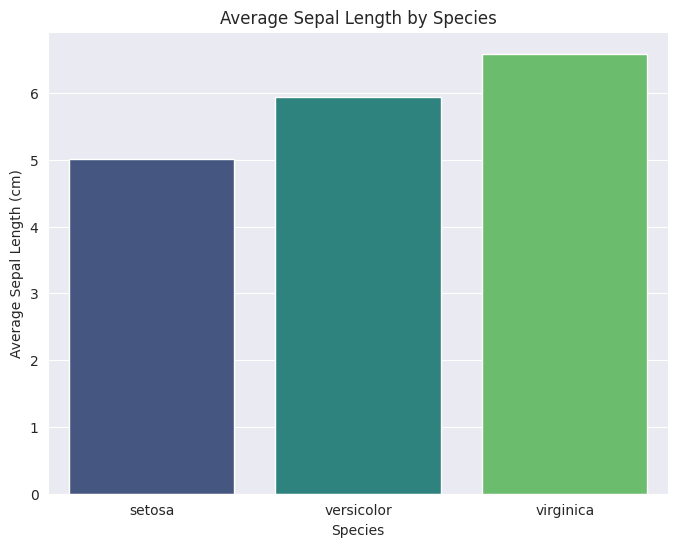

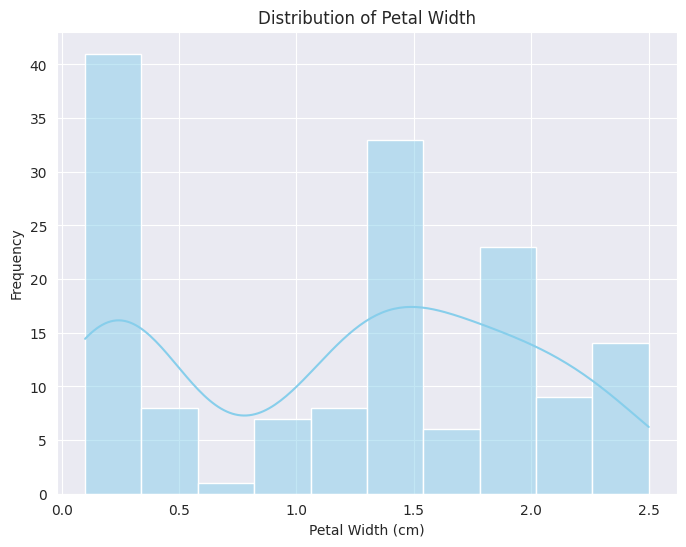

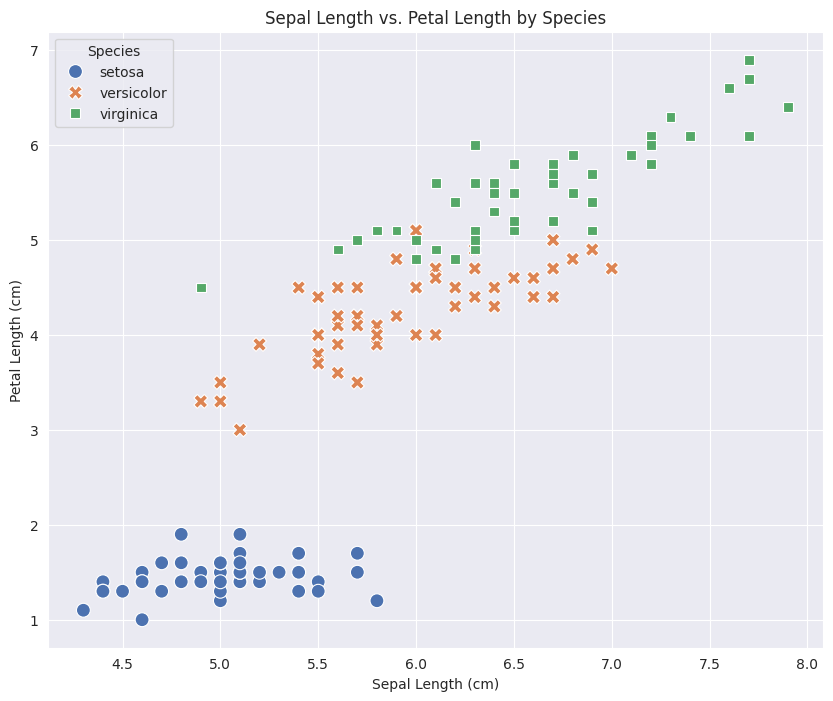

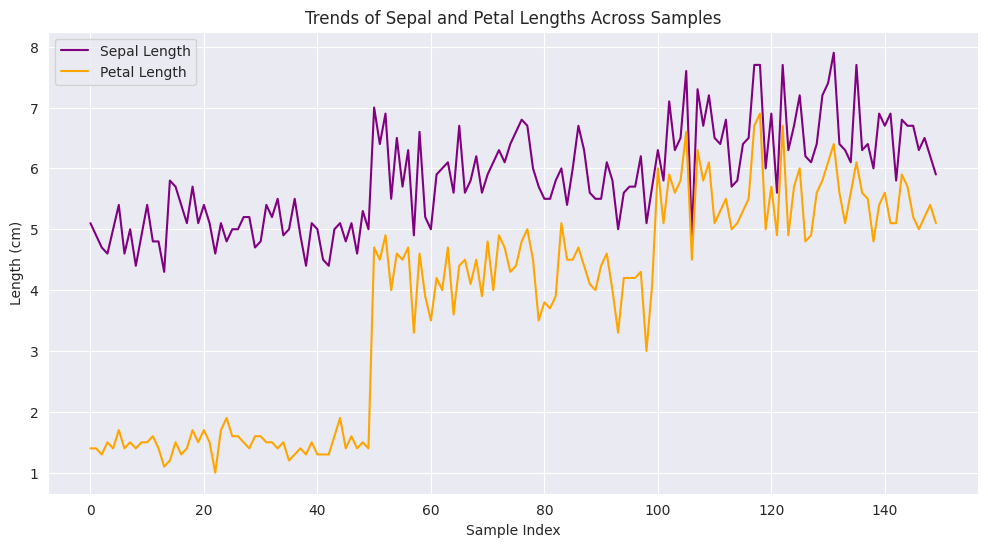


Data analysis and visualization tasks completed.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set a style for the plots for better visual appeal
sns.set_style("darkgrid")

# --- Task 1: Load and Explore the Dataset ---

print("--- Task 1: Loading and Exploring the Dataset ---")

try:
    # Load the Iris dataset from scikit-learn
    iris = load_iris()

    # Convert the dataset into a pandas DataFrame for easier manipulation
    df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['species'])

    # Map the numerical species values to their names for better readability
    df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    print("\nSuccessfully loaded the Iris dataset into a DataFrame.")

    # Display the first 5 rows to get a quick look at the data
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Check the data types and look for any missing values
    print("\nDataset structure and missing values:")
    df.info()

    # Clean the dataset: The Iris dataset is known to be clean, so we can
    # confirm the absence of missing values.
    # In a real-world scenario, you would use methods like df.dropna() or df.fillna()
    # to handle missing data.
    print("\nChecking for missing values:")
    print(df.isnull().sum())
    print("\nNote: This dataset has no missing values, so no cleaning is required.")

except FileNotFoundError as e:
    print(f"Error: The file was not found. Please check the file path. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading. Details: {e}")


# --- Task 2: Basic Data Analysis ---

print("\n\n--- Task 2: Basic Data Analysis ---")

# Compute basic statistics of the numerical columns using .describe()
print("\nDescriptive statistics of the numerical columns:")
print(df.describe())

# Group the data by the 'species' column and compute the mean of 'sepal length (cm)'
# for each group. This helps in understanding the average characteristics of each species.
grouped_data = df.groupby('species')['sepal length (cm)'].mean()

print("\nMean of Sepal Length for each species:")
print(grouped_data)

# --- Task 3: Data Visualization ---

print("\n\n--- Task 3: Data Visualization ---")
print("Generating four different types of plots...")

# 1. Bar Chart: Comparing average sepal length across species
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis')
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.show()


# 2. Histogram: Understanding the distribution of petal width
plt.figure(figsize=(8, 6))
sns.histplot(df['petal width (cm)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter Plot: Visualizing the relationship between two numerical columns
# We'll use different colors for each species to identify patterns.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species',
                data=df, palette='deep', s=100, style='species')
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

# 4. Line Chart: Showing trends (pseudo time-series)
# Since the dataset does not have a time component, this chart shows the trend
# of sepal length as we move through the dataset's rows.
plt.figure(figsize=(12, 6))
plt.plot(df['sepal length (cm)'], label='Sepal Length', color='purple')
plt.plot(df['petal length (cm)'], label='Petal Length', color='orange')
plt.title('Trends of Sepal and Petal Lengths Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Length (cm)')
plt.legend()
plt.show()

print("\nData analysis and visualization tasks completed.")